In [2]:
# import and load modules
%matplotlib inline

%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import numpy as np
from scipy import stats
from scipy.ndimage import gaussian_filter as gaussian_filter
import tifffile as tfl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import colorsys
import imghdr
n_ = np.newaxis
r_ = np.r_
import tensorflow as tf
import skimage
import imageio as io


# import src files
sys.path.append('./src/')
#import im_proc_utils as ipu
#import caiman_run as crun

### Define path to data

In [3]:
#MC path

folder_name_mc = r'D:\JW\03\033023\suite2p\plane0'

im_name_mc = 'reg_tif'

outfile_mc = os.path.join(folder_name_mc, im_name_mc) 

file_list_mc = os.listdir(outfile_mc)

#raw path

folder_name_raw = r'D:\JW\03'

im_name_raw = '033023'

outfile_raw = os.path.join(folder_name_raw, im_name_raw) 

file_list_raw = os.listdir(outfile_raw)


### loop through tif file list

In [5]:
#for MC

read_file_mc = []

for i in range(32):
    file_path = os.path.join(outfile_mc, file_list_mc[i])
    if imghdr.what(file_path) == "tiff":
        read_file_mc.append(tfl.imread(file_path))
    else:
        print(file_path, "is not a TIF file, ignoring...")
        continue

In [7]:
#for raw

read_file_raw = []

image_shape = []

for i in range(138,171):
    file_path = os.path.join(outfile_raw, file_list_raw[i])
    if imghdr.what(file_path) == "tiff":
        read_file_raw.append(tfl.imread(file_path))
        image_shape.append(np.reshape(read_file_raw[i-138], (3, 300, 512, 512)))
    else:
        print(file_path, "is not a TIF file, ignoring...")
        continue

D:\JW\03\033023\landmark.bmp is not a TIF file, ignoring...


### Pull out pre and post

In [22]:
# for raw files

image_reshape_pre_one = np.mean(image_shape[16:], axis = 0)
image_reshape_post_one = np.mean(image_shape[:16], axis = 0)
image_reshape_pre_two = np.mean(image_reshape_pre_one, axis = 0)
image_reshape_post_two = np.mean(image_reshape_post_one, axis = 0)
pre_raw = np.mean(image_reshape_pre_two, axis = 0)
post_raw = np.mean(image_reshape_post_two, axis = 0)
dfof_raw = (post_raw - pre_raw) / gaussian_filter(pre_raw, sigma=20) * 100

In [9]:
#for MC files 

pre_mc = np.mean(read_file_mc[:16], axis = 0)
post_mc = np.mean(read_file_mc[16:], axis = 0)
dfof_mc = (post_mc - pre_mc) / gaussian_filter(pre_mc, sigma=20) * 100

### plot dfof

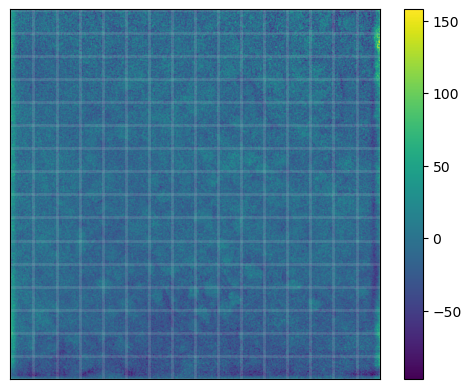

In [17]:
plt.imshow(dfof_mc)
plt.grid(color='lightgrey',which='major',linestyle='-',linewidth=2,alpha=0.15)
plt.grid(color='lightgrey',which='major',linestyle='-',linewidth=2,alpha=0.15)
plt.xticks([i*32 for i in range(17)],[]) #no tick labels\
plt.yticks([i*32 for i in range(17)],[]) #no tick labels
plt.gca().tick_params(axis=u'both', which=u'both',length=0) #no ticks
plt.colorbar()
#plt.savefig(os.path.join(outfile_raw,'dfof_mc'),bbox_inches='tight',dpi=800)

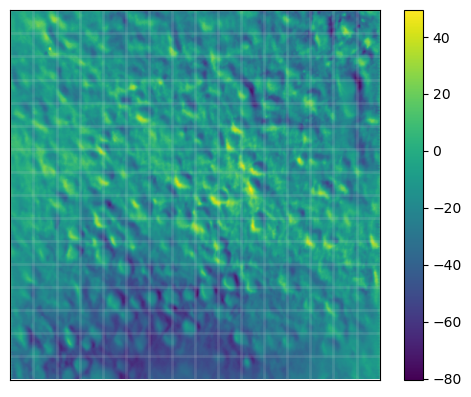

In [28]:
plt.imshow(dfof_raw)
plt.grid(color='lightgrey',which='major',linestyle='-',linewidth=2,alpha=0.15)
plt.grid(color='lightgrey',which='major',linestyle='-',linewidth=2,alpha=0.15)
plt.xticks([i*32 for i in range(17)],[]) #no tick labels\
plt.yticks([i*32 for i in range(17)],[]) #no tick labels
plt.gca().tick_params(axis=u'both', which=u'both',length=0) #no ticks
plt.colorbar()
#plt.savefig(os.path.join(outfile_raw,'dfof_raw'),bbox_inches='tight',dpi=800)

In [19]:
import inspect


argspec = inspect.getfullargspec(io.mimsave)
print(argspec.args)    # prints ['arg1', 'arg2']
print(argspec.defaults)    # prints ('default', 'default')
print(argspec.kwonlyargs)    # prints ['kwarg1', 'kwarg2']
print(argspec.kwonlydefaults)    # prints {'kwarg1': 'default', 'kwarg2': 'default'}


['uri', 'ims', 'format']
(None,)
[]
None
